## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## Carga de datos

In [2]:
# 1) Cargar y concatenar todos los archivos .sav de la carpeta 'data/violencia-intrafamiliar'
base_path = Path('../data/violencia-intrafamiliar')
sav_files = sorted(list(base_path.glob('*.sav')))
print(f'Archivos encontrados: {len(sav_files)}')
dfs = []
metadatas = {}
for p in sav_files:
   try:
      df, meta = pyreadstat.read_sav(p)
      year = p.stem.split('-')[0] if '-' in p.stem else p.stem
      df = df.copy()
      df['__source_year'] = year
      dfs.append(df)
      metadatas[year] = meta
      print(f'Leido: {p.name} -> shape {df.shape}')
   except Exception as e:
      print(f'Error leyendo {p}: {e}')

if dfs:
   data = pd.concat(dfs, ignore_index=True, sort=False)
   print('Concatenación completa. Shape total:', data.shape)
else:
   data = pd.DataFrame()
   print('No se cargó ningún archivo.')

Archivos encontrados: 12
Leido: 2009-intrafamiliar.sav -> shape (31497, 47)
Leido: 2010-intrafamiliar.sav -> shape (32017, 47)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido: 2019-intrafamiliar.sav -> shape (31898, 73)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido:

# Análisis Exploratorio de Datos - Violencia Intrafamiliar

Este notebook contiene un análisis exploratorio completo de los datos de violencia intrafamiliar en Guatemala (2009-2020). El objetivo es explorar los datos, encontrar patrones y formular preguntas de investigación interesantes.

## 1a) Descripción del Conjunto de Datos

En esta sección describimos el dataset: número de variables, observaciones y el tipo de cada variable.

In [3]:
# INCISO 1A) DESCRIPCIÓN DEL CONJUNTO DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

# Veamos las primeras filas para entender los datos
print("\n" + "="*60)
print("PRIMERAS 8 FILAS DEL DATASET")
print("="*60)
data.head(8)

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

PRIMERAS 8 FILAS DEL DATASET


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
0,2009.0,1.0,20.0,101.0,1.0,2.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,1.0,8.0,201.0,3.0,1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009.0,1.0,12.0,201.0,1.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009.0,1.0,6.0,204.0,2.0,2.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009.0,1.0,6.0,204.0,2.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009.0,1.0,2.0,206.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009.0,1.0,18.0,1201.0,1.0,2.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009.0,1.0,18.0,1504.0,1.0,1.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# INCISO 1A) - ANÁLISIS DE TIPOS DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

print("\n" + "="*60)
print("TIPOS DE DATOS DE CADA VARIABLE")
print("="*60)

# Información básica de tipos de datos
print("Información de tipos de datos:")
print(data.dtypes)

print("\n" + "="*60)
print("RESUMEN DE TIPOS DE DATOS")
print("="*60)
print(data.dtypes.value_counts())

print("\n" + "="*60)
print("ANÁLISIS DE VALORES NULOS")
print("="*60)

# Creamos un resumen detallado de cada variable
resumen_variables = pd.DataFrame({
    'Tipo_Dato': data.dtypes,
    'Valores_No_Nulos': data.count(),
    'Valores_Nulos': data.isnull().sum(),
    'Porcentaje_Nulos': (data.isnull().sum() / len(data) * 100).round(2),
    'Valores_Unicos': data.nunique()
})

print("Resumen completo de variables:")
display(resumen_variables)

print("\n" + "="*60)
print("VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS")
print("="*60)

# Verificamos específicamente TOTAL_HIJOS
print("Análisis detallado de TOTAL_HIJOS:")
print(f"  - Tipo de dato: {data['TOTAL_HIJOS'].dtype}")
print(f"  - Total registros: {len(data):,}")
print(f"  - Valores no nulos: {data['TOTAL_HIJOS'].count():,}")
print(f"  - Valores nulos: {data['TOTAL_HIJOS'].isnull().sum():,}")
print(f"  - Porcentaje no nulos: {(data['TOTAL_HIJOS'].count() / len(data) * 100):.1f}%")

# Veamos algunos valores reales (no nulos)
valores_reales = data['TOTAL_HIJOS'].dropna()
if len(valores_reales) > 0:
    print(f"  - Valores únicos: {valores_reales.nunique()}")
    print(f"  - Rango: {valores_reales.min()} - {valores_reales.max()}")
    print(f"  - Primeros 10 valores reales: {valores_reales.head(10).tolist()}")

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

TIPOS DE DATOS DE CADA VARIABLE
Información de tipos de datos:
ANO_EMISION         float64
MES_EMISION         float64
DIA_EMISION         float64
DEPTO_MCPIO         float64
QUIEN_REPORTA       float64
                     ...   
ARTICULOTRAS2       float64
ARTICULOTRAS3       float64
ARTICULOTRAS4       float64
ORGANISMO_REMITE    float64
filter_$            float64
Length: 75, dtype: object

RESUMEN DE TIPOS DE DATOS
float64    73
object      2
Name: count, dtype: int64

ANÁLISIS DE VALORES NULOS
Resumen completo de variables:


,Tipo_Dato,Valores_No_Nulos,Valores_Nulos,Porcentaje_Nulos,Valores_Unicos
ANO_EMISION,float64,387257,0,0.00,12
MES_EMISION,float64,387257,0,0.00,12
DIA_EMISION,float64,387257,0,0.00,31
DEPTO_MCPIO,float64,387257,0,0.00,339
QUIEN_REPORTA,float64,387257,0,0.00,4
...,...,...,...,...,...
ARTICULOTRAS2,float64,413,386844,99.89,3
ARTICULOTRAS3,float64,413,386844,99.89,2
ARTICULOTRAS4,float64,413,386844,99.89,2
ORGANISMO_REMITE,float64,64203,323054,83.42,20



VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS
Análisis detallado de TOTAL_HIJOS:
  - Tipo de dato: float64
  - Total registros: 387,257
  - Valores no nulos: 385,519
  - Valores nulos: 1,738
  - Porcentaje no nulos: 99.6%
  - Valores únicos: 21
  - Rango: 0.0 - 99.0
  - Primeros 10 valores reales: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 1b) Resumen de variables numericas

Realicen un resumen de las variables numéricas e investiguen si siguen una
distribución normal, si no es así expliquen la distribución que pueden presentar.
Para las variables categóricas obtengan una tabla de frecuencia, documenten lo
que vayan encontrando.

In [5]:
# INCISO 1B) RESUMEN DE VARIABLES NUMÉRICAS Y DISTRIBUCIÓN NORMAL

# Primero identificamos las variables numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("="*60)
print("VARIABLES NUMÉRICAS IDENTIFICADAS")
print("="*60)
print(f"Total de variables numéricas: {len(variables_numericas)}")
for i, var in enumerate(variables_numericas, 1):
   print(f"  {i}. {var}")

# Estadísticas descriptivas básicas
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

estadisticas_desc = data[variables_numericas].describe()
print("Estadísticas básicas (mean, std, min, max, percentiles):")
display(estadisticas_desc)

# Agregamos algunas estadísticas adicionales útiles
print("\n" + "="*60)
print("ESTADÍSTICAS ADICIONALES")
print("="*60)

estadisticas_extra = pd.DataFrame({
   'Media': data[variables_numericas].mean(),
   'Mediana': data[variables_numericas].median(),
   'Moda': data[variables_numericas].mode().iloc[0] if len(data[variables_numericas].mode()) > 0 else None,
   'Desviacion_Std': data[variables_numericas].std(),
   'Varianza': data[variables_numericas].var(),
   'Asimetria': data[variables_numericas].skew(),
   'Curtosis': data[variables_numericas].kurtosis(),
   'Rango': data[variables_numericas].max() - data[variables_numericas].min()
})

display(estadisticas_extra)

VARIABLES NUMÉRICAS IDENTIFICADAS
Total de variables numéricas: 73
  1. ANO_EMISION
  2. MES_EMISION
  3. DIA_EMISION
  4. DEPTO_MCPIO
  5. QUIEN_REPORTA
  6. VIC_SEXO
  7. VIC_EDAD
  8. TOTAL_HIJOS
  9. NUM_HIJ_HOM
  10. NUM_HIJ_MUJ
  11. VIC_ALFAB
  12. VIC_ESCOLARIDAD
  13. VIC_EST_CIV
  14. VIC_GRUPET
  15. VIC_NACIONAL
  16. VIC_TRABAJA
  17. VIC_OCUP
  18. VIC_DEDICA
  19. VIC_DISC
  20. TIPO_DISCAQ
  21. VIC_REL_AGR
  22. OTRAS_VICTIMAS
  23. VIC_OTRAS_HOM
  24. VIC_OTRAS_MUJ
  25. VIC_OTRAS_N_OS
  26. VIC_OTRAS_N_AS
  27. HEC_DIA
  28. HEC_MES
  29. HEC_ANO
  30. HEC_DEPTOMCPIO
  31. HEC_AREA
  32. HEC_TIPAGRE
  33. HEC_RECUR_DENUN
  34. INST_DONDE_DENUNCIO
  35. AGR_SEXO
  36. AGR_EDAD
  37. AGR_ALFAB
  38. AGR_ESCOLARIDAD
  39. AGR_EST_CIV
  40. AGR_GURPET
  41. AGR_NACIONAL
  42. AGR_TRABAJA
  43. AGR_OCUP
  44. AGR_DEDICA
  45. INST_DENUN_HECHO
  46. MEDIDAS_SEGURIDAD
  47. AGR_GRUPET
  48. LEY_APLICABLE
  49. AGRESORES_OTROS_TOTAL
  50. AGR_OTROS_HOM
  51. AGR_OTRAS_MUJ
  

,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
count,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,385519.000000,385519.000000,385519.000000,...,798.000000,798.000000,798.000000,798.000000,413.000000,413.000000,413.000000,413.000000,64203.000000,29988.000000
mean,2014.361734,6.409831,15.332136,970.043643,1.124305,1.896330,33.506604,18.529429,17.651509,17.588446,...,664.269424,546.273183,524.973684,524.537594,988.690073,988.280872,986.905569,986.905569,36.262511,0.000033
std,3.392050,3.381359,8.747814,650.129646,0.887118,0.304833,14.460042,36.305425,36.679061,36.701557,...,365.303451,480.323780,498.804333,499.184967,93.255994,97.147963,109.384790,109.384790,36.677530,0.005775
min,2009.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,141.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011.000000,4.000000,8.000000,312.000000,1.000000,2.000000,24.000000,1.000000,0.000000,0.000000,...,215.000000,0.000000,0.000000,0.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
50%,2014.000000,6.000000,15.000000,1005.000000,1.000000,2.000000,30.000000,2.000000,1.000000,1.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
75%,2017.000000,9.000000,23.000000,1601.000000,1.000000,2.000000,39.000000,4.000000,3.000000,3.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,0.000000
max,2020.000000,12.000000,31.000000,2217.000000,9.000000,2.000000,99.000000,99.000000,99.000000,99.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,1.000000



ESTADÍSTICAS ADICIONALES


,Media,Mediana,Moda,Desviacion_Std,Varianza,Asimetria,Curtosis,Rango
ANO_EMISION,2014.361734,2014.0,2013.0,3.392050,11.506003,0.069038,-1.177745,11.0
MES_EMISION,6.409831,6.0,7.0,3.381359,11.433588,0.029698,-1.171984,11.0
DIA_EMISION,15.332136,15.0,3.0,8.747814,76.524258,0.054975,-1.193510,30.0
DEPTO_MCPIO,970.043643,1005.0,101.0,650.129646,422668.556607,0.135120,-1.184881,2116.0
QUIEN_REPORTA,1.124305,1.0,1.0,0.887118,0.786979,8.404419,71.155560,8.0
...,...,...,...,...,...,...,...,...
ARTICULOTRAS2,988.280872,999.0,999.0,97.147963,9437.726745,-9.015717,80.084243,999.0
ARTICULOTRAS3,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ARTICULOTRAS4,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ORGANISMO_REMITE,36.262511,17.0,17.0,36.677530,1345.241171,1.087958,-0.720542,98.0


In [6]:
# CONTINUACIÓN INCISO 1B) - PRUEBA DE NORMALIDAD

print("="*60)
print("PRUEBA DE NORMALIDAD (SHAPIRO-WILK)")
print("="*60)
print("H0: Los datos siguen una distribución normal")
print("Si p-valor < 0.05, rechazamos H0 (NO es normal)")
print("="*60)

resultados_normalidad = []

for col in variables_numericas:
   # Tomamos una muestra de 5000 datos (límite de Shapiro-Wilk)
   muestra = data[col].dropna()
   if len(muestra) > 5000:
      muestra = muestra.sample(5000, random_state=42)
   
   if len(muestra) > 3:  # Necesitamos al menos 3 datos
      stat, p_valor = stats.shapiro(muestra)
      es_normal = "Sí" if p_valor > 0.05 else "No"
      
      # Calculamos asimetría y curtosis para entender la distribución
      asimetria = data[col].skew()
      curtosis = data[col].kurtosis()
      
      resultados_normalidad.append({
         'Variable': col,
         'Estadístico': round(stat, 4),
         'P-valor': round(p_valor, 6),
         'Es_Normal': es_normal,
         'Asimetría': round(asimetria, 3),
         'Curtosis': round(curtosis, 3)
      })

df_normalidad = pd.DataFrame(resultados_normalidad)
display(df_normalidad)

# Interpretación de las distribuciones
print("\n" + "="*60)
print("INTERPRETACIÓN DE LAS DISTRIBUCIONES")
print("="*60)

for _, row in df_normalidad.iterrows():
   print(f"\n Variable: {row['Variable']}")
   print(f"   - Es normal: {row['Es_Normal']}")
   
   # Interpretamos la asimetría
   if row['Asimetría'] > 0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la DERECHA (cola larga hacia valores altos)")
   elif row['Asimetría'] < -0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)")
   else:
      print(f"   - Asimetría ({row['Asimetría']}): Aproximadamente SIMÉTRICA")
   
   # Interpretamos la curtosis
   if row['Curtosis'] > 1:
      print(f"   - Curtosis ({row['Curtosis']}): LEPTOCÚRTICA (pico alto, colas pesadas)")
   elif row['Curtosis'] < -1:
      print(f"   - Curtosis ({row['Curtosis']}): PLATICÚRTICA (pico bajo, colas ligeras)")
   else:
      print(f"   - Curtosis ({row['Curtosis']}): MESOCÚRTICA (similar a normal)")

PRUEBA DE NORMALIDAD (SHAPIRO-WILK)
H0: Los datos siguen una distribución normal
Si p-valor < 0.05, rechazamos H0 (NO es normal)


,Variable,Estadístico,P-valor,Es_Normal,Asimetría,Curtosis
0,ANO_EMISION,0.9443,0.0,No,0.069,-1.178
1,MES_EMISION,0.9462,0.0,No,0.030,-1.172
2,DIA_EMISION,0.9511,0.0,No,0.055,-1.194
3,DEPTO_MCPIO,0.9303,0.0,No,0.135,-1.185
4,QUIEN_REPORTA,0.1223,0.0,No,8.404,71.156
...,...,...,...,...,...,...
68,ARTICULOTRAS2,0.0842,0.0,No,-9.016,80.084
69,ARTICULOTRAS3,0.0834,0.0,No,-8.955,78.575
70,ARTICULOTRAS4,0.0834,0.0,No,-8.955,78.575
71,ORGANISMO_REMITE,0.6344,0.0,No,1.088,-0.721



INTERPRETACIÓN DE LAS DISTRIBUCIONES

 Variable: ANO_EMISION
   - Es normal: No
   - Asimetría (0.069): Aproximadamente SIMÉTRICA
   - Curtosis (-1.178): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: MES_EMISION
   - Es normal: No
   - Asimetría (0.03): Aproximadamente SIMÉTRICA
   - Curtosis (-1.172): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DIA_EMISION
   - Es normal: No
   - Asimetría (0.055): Aproximadamente SIMÉTRICA
   - Curtosis (-1.194): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DEPTO_MCPIO
   - Es normal: No
   - Asimetría (0.135): Aproximadamente SIMÉTRICA
   - Curtosis (-1.185): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: QUIEN_REPORTA
   - Es normal: No
   - Asimetría (8.404): Sesgada a la DERECHA (cola larga hacia valores altos)
   - Curtosis (71.156): LEPTOCÚRTICA (pico alto, colas pesadas)

 Variable: VIC_SEXO
   - Es normal: No
   - Asimetría (-2.6): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)
   - Curtosis (4.762): LEPTOC

VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS


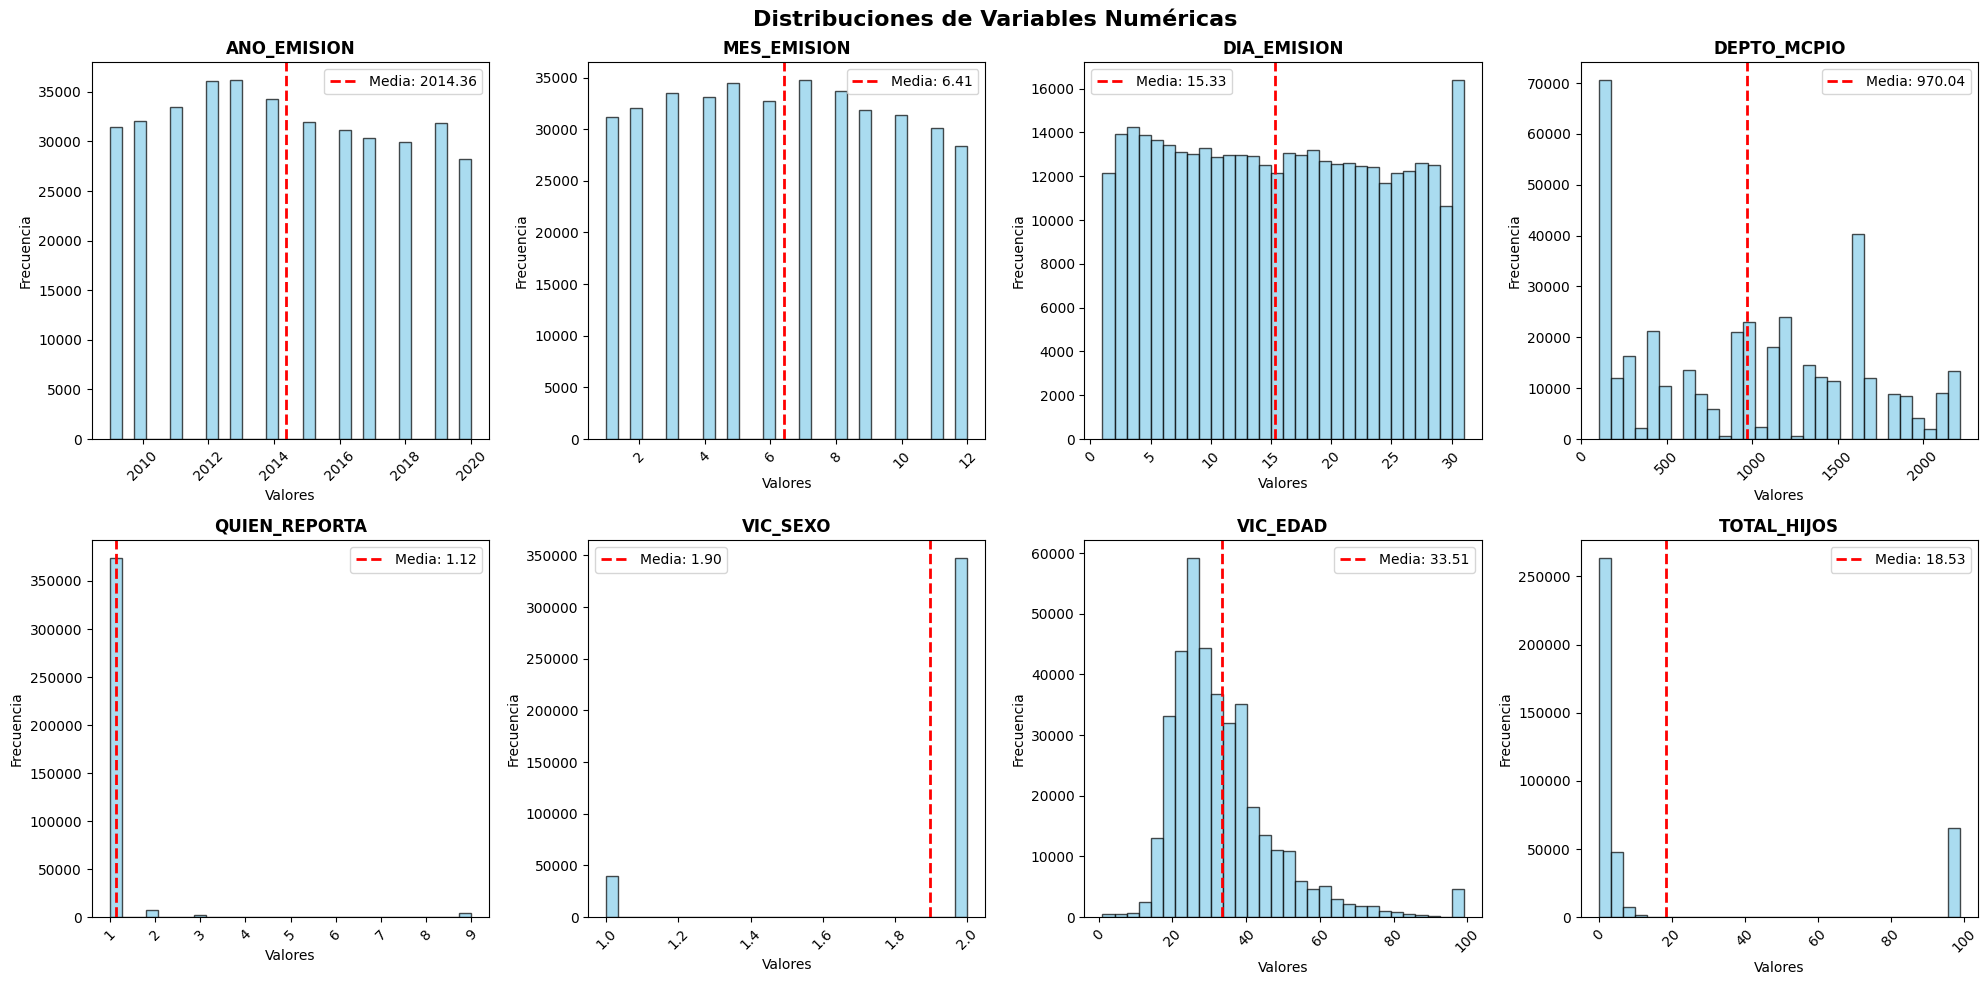


RESUMEN DE DISTRIBUCIONES OBSERVADAS

 ANO_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.069, Curtosis=-1.178

 MES_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.03, Curtosis=-1.172

 DIA_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.055, Curtosis=-1.194

 DEPTO_MCPIO:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.135, Curtosis=-1.185

 QUIEN_REPORTA:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=8.404, Curtosis=71.156

 VIC_SEXO:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la izquierda
   ── Interpretación: Asimetría=-2.6, Curtosis=4.762

 VIC_EDAD:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=1.787, Curtosis=4.657

 TOTAL_HIJOS:
 

In [7]:
# CONTINUACIÓN INCISO 1B) - HISTOGRAMAS DE VARIABLES NUMÉRICAS

print("="*60)
print("VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS")
print("="*60)

# Configuramos el estilo de los gráficos
plt.style.use('default')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

# Aplanamos los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
   if i < len(axes):
      # Filtramos valores no nulos
      datos_limpios = data[col].dropna()
      
      # Creamos el histograma
      axes[i].hist(datos_limpios, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
      axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Valores')
      axes[i].set_ylabel('Frecuencia')
      
      # Añadimos línea de la media
      media = datos_limpios.mean()
      axes[i].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
      axes[i].legend()
      
      # Rotamos etiquetas si es necesario
      axes[i].tick_params(axis='x', rotation=45)

# Ocultamos ejes vacíos si hay menos de 8 variables
for j in range(len(variables_numericas), len(axes)):
   axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Interpretación breve de cada distribución
print("\n" + "="*60)
print("RESUMEN DE DISTRIBUCIONES OBSERVADAS")
print("="*60)

for _, row in df_normalidad.iterrows():
   var = row['Variable']
   print(f"\n {var}:")
   print(f"   ── Normal: {row['Es_Normal']}")
   
   # Interpretación basada en asimetría
   if row['Asimetría'] > 1:
      print(f"   ── Distribución: Fuertemente sesgada a la derecha")
   elif row['Asimetría'] > 0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la derecha")
   elif row['Asimetría'] < -1:
      print(f"   ── Distribución: Fuertemente sesgada a la izquierda")
   elif row['Asimetría'] < -0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la izquierda")
   else:
      print(f"   ── Distribución: Aproximadamente simétrica")

   print(f"   ── Interpretación: Asimetría={row['Asimetría']}, Curtosis={row['Curtosis']}")

In [8]:
# INCISO 1B) - TABLAS DE FRECUENCIA PARA VARIABLES CATEGÓRICAS

print("="*60)
print("TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS")
print("="*60)

# Diccionario de etiquetas basado en el diccionario de datos del INE
etiquetas = {
    'VIC_SEXO': {1.0: 'Hombre', 2.0: 'Mujer'},
    'AGR_SEXO': {1.0: 'Hombre', 2.0: 'Mujer'},
    'HEC_AREA': {1.0: 'Urbana', 2.0: 'Rural'},
    'QUIEN_REPORTA': {1.0: 'Victima', 2.0: 'Familiar de la victima', 3.0: 'Otro', 9.0: 'Ignorado'},
    'VIC_ALFAB': {1.0: 'Alfabeta', 2.0: 'Analfabeta', 9.0: 'Ignorado'},
    'VIC_EST_CIV': {1.0: 'Soltero(a)', 2.0: 'Casado(a)', 3.0: 'Unido(a)', 4.0: 'Viudo(a)', 5.0: 'Otro', 9.0: 'Ignorado'},
    'VIC_GRUPET': {1.0: 'Ladino', 2.0: 'Maya', 3.0: 'Garifuna', 4.0: 'Xinka', 5.0: 'Otro', 6.0: 'No indica', 9.0: 'Ignorado'},
    'VIC_TRABAJA': {1.0: 'Si trabaja', 2.0: 'No trabaja', 9.0: 'Ignorado'},
    'VIC_DISC': {1.0: 'Con discapacidad', 2.0: 'Sin discapacidad', 9.0: 'Ignorado'},
    'VIC_NACIONAL': {1.0: 'Guatemalteca', 2.0: 'Extranjera', 9.0: 'Ignorado'},
    'VIC_REL_AGR': {1.0: 'Esposo/a', 2.0: 'Conviviente', 3.0: 'Exconviviente', 4.0: 'Hijo/a', 
                    5.0: 'Hijastro/a', 6.0: 'Padre/Madre', 7.0: 'Nieto/a', 8.0: 'Suegro/a', 
                    9.0: 'Hermano/a', 10.0: 'Otro pariente'},
    'HEC_MES': {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'},
    'MES_EMISION': {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'}
}

# Variables categóricas principales a analizar
variables_categoricas = ['VIC_SEXO', 'AGR_SEXO', 'VIC_EST_CIV', 'VIC_GRUPET', 
                        'VIC_REL_AGR', 'VIC_TRABAJA', 'VIC_ALFAB', 'QUIEN_REPORTA']

# Filtrar solo las que existen en el dataset
variables_categoricas = [v for v in variables_categoricas if v in data.columns]

print(f"Variables categóricas a analizar: {len(variables_categoricas)}")
print("-"*60)

# Función para crear tabla de frecuencia con etiquetas
def crear_tabla_frecuencia(df, variable, etiquetas_dict):
    """Genera tabla de frecuencia con etiquetas descriptivas"""
    frecuencias = df[variable].value_counts().sort_index()
    total = frecuencias.sum()
    porcentajes = (frecuencias / total * 100).round(2)
    
    tabla = pd.DataFrame({
        'Codigo': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje': porcentajes.values
    })
    
    # Agregar etiquetas si existen en el diccionario
    if variable in etiquetas_dict:
        tabla['Descripcion'] = tabla['Codigo'].map(etiquetas_dict[variable])
        tabla['Descripcion'] = tabla['Descripcion'].fillna('Otro/Desconocido')
        # Reordenar columnas
        tabla = tabla[['Codigo', 'Descripcion', 'Frecuencia', 'Porcentaje']]
    
    return tabla

# Generar tablas de frecuencia
for var in variables_categoricas:
    print(f"\n{'='*60}")
    print(f"VARIABLE: {var}")
    print(f"{'='*60}")
    
    tabla = crear_tabla_frecuencia(data, var, etiquetas)
    display(tabla)
    
    # Mostrar el valor más frecuente (moda)
    moda_codigo = data[var].mode().iloc[0] if len(data[var].mode()) > 0 else None
    if var in etiquetas and moda_codigo in etiquetas[var]:
        moda_desc = etiquetas[var][moda_codigo]
        print(f"\nValor más frecuente (moda): {moda_desc} (código {moda_codigo})")

TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS
Variables categóricas a analizar: 8
------------------------------------------------------------

VARIABLE: VIC_SEXO


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Hombre,40147,10.37
1,2.0,Mujer,347110,89.63



Valor más frecuente (moda): Mujer (código 2.0)

VARIABLE: AGR_SEXO


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Hombre,338178,87.33
1,2.0,Mujer,49079,12.67



Valor más frecuente (moda): Hombre (código 1.0)

VARIABLE: VIC_EST_CIV


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Soltero(a),68527,17.78
1,2.0,Casado(a),167131,43.35
2,3.0,Unido(a),97454,25.28
3,4.0,Viudo(a),2923,0.76
4,5.0,Otro,6780,1.76
5,9.0,Ignorado,42704,11.08



Valor más frecuente (moda): Casado(a) (código 2.0)

VARIABLE: VIC_GRUPET


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Ladino,217833,56.25
1,2.0,Maya,118627,30.63
2,3.0,Garifuna,538,0.14
3,4.0,Xinka,560,0.14
4,5.0,Otro,2331,0.60
5,6.0,No indica,40972,10.58
6,9.0,Ignorado,6396,1.65



Valor más frecuente (moda): Ladino (código 1.0)

VARIABLE: VIC_REL_AGR


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Esposo/a,130685,33.75
1,2.0,Conviviente,118909,30.71
2,3.0,Exconviviente,55533,14.34
3,4.0,Hijo/a,8352,2.16
4,5.0,Hijastro/a,1286,0.33
5,6.0,Padre/Madre,15994,4.13
6,7.0,Nieto/a,496,0.13
7,8.0,Suegro/a,4633,1.20
8,9.0,Hermano/a,17200,4.44
9,10.0,Otro pariente,34169,8.82



Valor más frecuente (moda): Esposo/a (código 1.0)

VARIABLE: VIC_TRABAJA


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Si trabaja,126386,32.7
1,2.0,No trabaja,258208,66.8
2,9.0,Ignorado,1934,0.5



Valor más frecuente (moda): No trabaja (código 2.0)

VARIABLE: VIC_ALFAB


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Alfabeta,312259,80.79
1,2.0,Analfabeta,72147,18.67
2,9.0,Ignorado,2122,0.55



Valor más frecuente (moda): Alfabeta (código 1.0)

VARIABLE: QUIEN_REPORTA


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Victima,373508,96.45
1,2.0,Familiar de la victima,7050,1.82
2,3.0,Otro,2084,0.54
3,9.0,Ignorado,4615,1.19



Valor más frecuente (moda): Victima (código 1.0)


## 1c) Cruce de Variables Importantes

En esta seccion cruzamos las variables mas relevantes para identificar patrones y elementos clave que ayuden a comprender las causas de la violencia intrafamiliar.

Los cruces que realizaremos son:
1. **Sexo de la victima vs Sexo del agresor** - Para ver quien agrede a quien
2. **Relacion victima-agresor vs Sexo de la victima** - Para entender el tipo de relacion en que ocurre la violencia
3. **Estado civil vs Sexo de la victima** - Para ver en que situaciones conyugales hay mas violencia
4. **Grupo etnico vs Sexo de la victima** - Para ver si hay diferencias por grupo etnico
5. **Edad de la victima por sexo** - Para identificar rangos de edad mas vulnerables

CRUCE 1: SEXO DE LA VICTIMA VS SEXO DEL AGRESOR
Este cruce nos permite ver quien agrede a quien.
----------------------------------------------------------------------

Frecuencias absolutas:


AGR_SEXO,Hombre,Mujer,Total
VIC_SEXO,,,
Hombre,12376,27771,40147
Mujer,325802,21308,347110
Total,338178,49079,387257



Porcentaje por tipo de victima (fila):


AGR_SEXO,Hombre,Mujer
VIC_SEXO,,
Hombre,30.83,69.17
Mujer,93.86,6.14


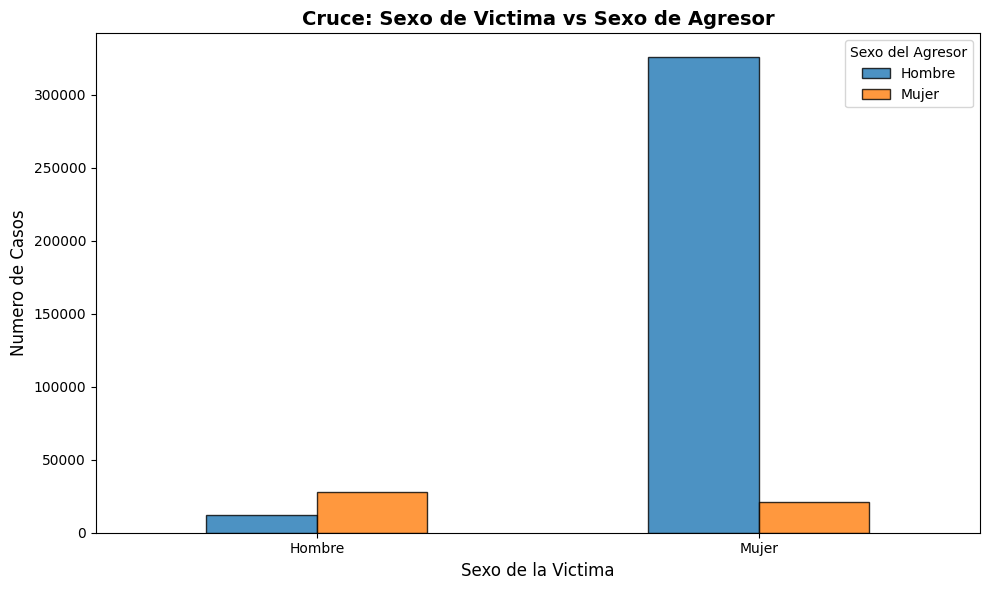


HALLAZGO: Este cruce muestra claramente quien agrede a quien en casos
de violencia intrafamiliar.


In [9]:
# INCISO 1C) - CRUCE DE VARIABLES IMPORTANTES

print("="*70)
print("CRUCE 1: SEXO DE LA VICTIMA VS SEXO DEL AGRESOR")
print("="*70)
print("Este cruce nos permite ver quien agrede a quien.")
print("-"*70)

# Tabla de contingencia
cruce1 = pd.crosstab(data['VIC_SEXO'], data['AGR_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce1.index = cruce1.index.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)
cruce1.columns = cruce1.columns.map(lambda x: etiquetas['AGR_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce1)

# Porcentajes por fila
cruce1_pct = pd.crosstab(data['VIC_SEXO'], data['AGR_SEXO'], normalize='index') * 100
cruce1_pct.index = cruce1_pct.index.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))
cruce1_pct.columns = cruce1_pct.columns.map(lambda x: etiquetas['AGR_SEXO'].get(x, x))

print("\nPorcentaje por tipo de victima (fila):")
display(cruce1_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 6))
cruce1_plot = pd.crosstab(data['VIC_SEXO'].map(etiquetas['VIC_SEXO']), 
                          data['AGR_SEXO'].map(etiquetas['AGR_SEXO']))
cruce1_plot.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.8)
ax.set_xlabel('Sexo de la Victima', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Sexo de Victima vs Sexo de Agresor', fontsize=14, fontweight='bold')
ax.legend(title='Sexo del Agresor')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce muestra claramente quien agrede a quien en casos")
print("de violencia intrafamiliar.")

CRUCE 2: RELACION VICTIMA-AGRESOR VS SEXO DE LA VICTIMA
Este cruce nos muestra en que tipo de relacion ocurre mas la violencia.
----------------------------------------------------------------------

Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_REL_AGR,,,
Esposo/a,10279,120406,130685
Conviviente,7247,111662,118909
Exconviviente,5409,50124,55533
Hijo/a,1986,6366,8352
Hijastro/a,210,1076,1286
Padre/Madre,5063,10931,15994
Nieto/a,105,391,496
Suegro/a,833,3800,4633
Hermano/a,3423,13777,17200



Porcentaje por sexo de victima (columna):


VIC_SEXO,Hombre,Mujer
VIC_REL_AGR,,
Esposo/a,25.60,34.69
Conviviente,18.05,32.17
Exconviviente,13.47,14.44
Hijo/a,4.95,1.83
Hijastro/a,0.52,0.31
Padre/Madre,12.61,3.15
Nieto/a,0.26,0.11
Suegro/a,2.07,1.09
Hermano/a,8.53,3.97


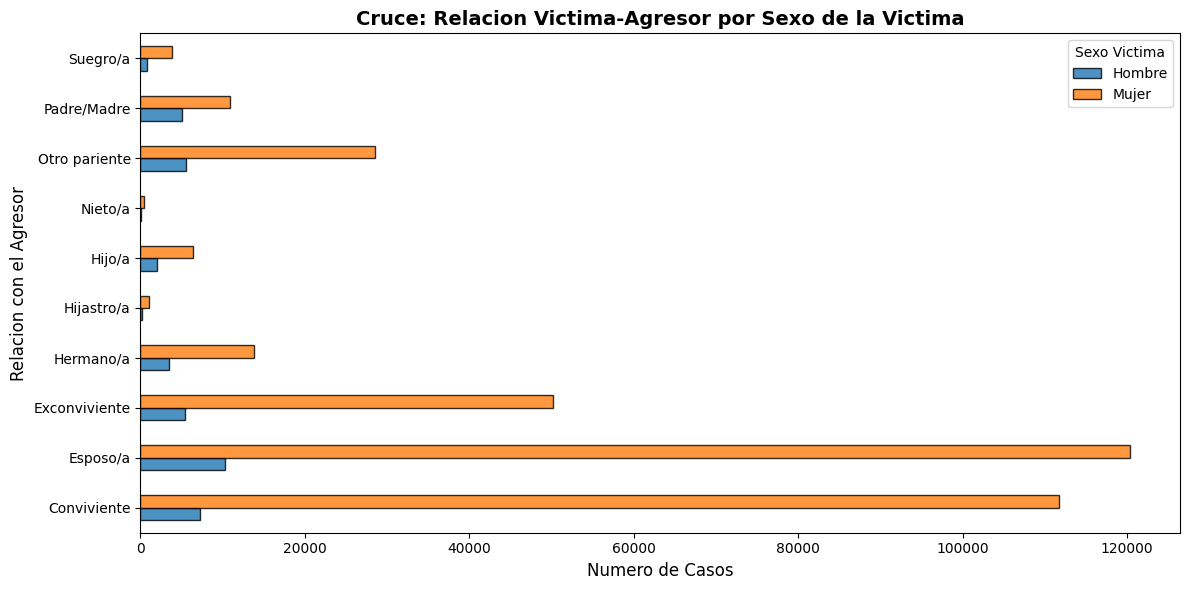


HALLAZGO: Este cruce revela que tipo de relacion familiar es mas
propensa a la violencia, diferenciando por sexo de la victima.


In [10]:
# CRUCE 2: RELACION VICTIMA-AGRESOR VS SEXO DE LA VICTIMA

print("="*70)
print("CRUCE 2: RELACION VICTIMA-AGRESOR VS SEXO DE LA VICTIMA")
print("="*70)
print("Este cruce nos muestra en que tipo de relacion ocurre mas la violencia.")
print("-"*70)

# Tabla de contingencia
cruce2 = pd.crosstab(data['VIC_REL_AGR'], data['VIC_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce2.index = cruce2.index.map(lambda x: etiquetas['VIC_REL_AGR'].get(x, x) if x != 'Total' else x)
cruce2.columns = cruce2.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce2)

# Porcentajes por columna (para ver distribucion dentro de cada sexo)
cruce2_pct = pd.crosstab(data['VIC_REL_AGR'], data['VIC_SEXO'], normalize='columns') * 100
cruce2_pct.index = cruce2_pct.index.map(lambda x: etiquetas['VIC_REL_AGR'].get(x, x))
cruce2_pct.columns = cruce2_pct.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))

print("\nPorcentaje por sexo de victima (columna):")
display(cruce2_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(12, 6))
cruce2_plot = pd.crosstab(data['VIC_REL_AGR'].map(etiquetas['VIC_REL_AGR']), 
                          data['VIC_SEXO'].map(etiquetas['VIC_SEXO']))
cruce2_plot.plot(kind='barh', ax=ax, edgecolor='black', alpha=0.8)
ax.set_ylabel('Relacion con el Agresor', fontsize=12)
ax.set_xlabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Relacion Victima-Agresor por Sexo de la Victima', fontsize=14, fontweight='bold')
ax.legend(title='Sexo Victima')
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce revela que tipo de relacion familiar es mas")
print("propensa a la violencia, diferenciando por sexo de la victima.")

CRUCE 3: ESTADO CIVIL VS SEXO DE LA VICTIMA
Este cruce nos muestra en que situacion conyugal hay mas violencia.
----------------------------------------------------------------------



Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_EST_CIV,,,
Soltero(a),7691,60836,68527
Casado(a),19129,148002,167131
Unido(a),7648,89806,97454
Viudo(a),389,2534,2923
Otro,803,5977,6780
Ignorado,3743,38961,42704
Total,39403,346116,385519



Porcentaje por sexo de victima (columna):


VIC_SEXO,Hombre,Mujer
VIC_EST_CIV,,
Soltero(a),19.52,17.58
Casado(a),48.55,42.76
Unido(a),19.41,25.95
Viudo(a),0.99,0.73
Otro,2.04,1.73
Ignorado,9.50,11.26


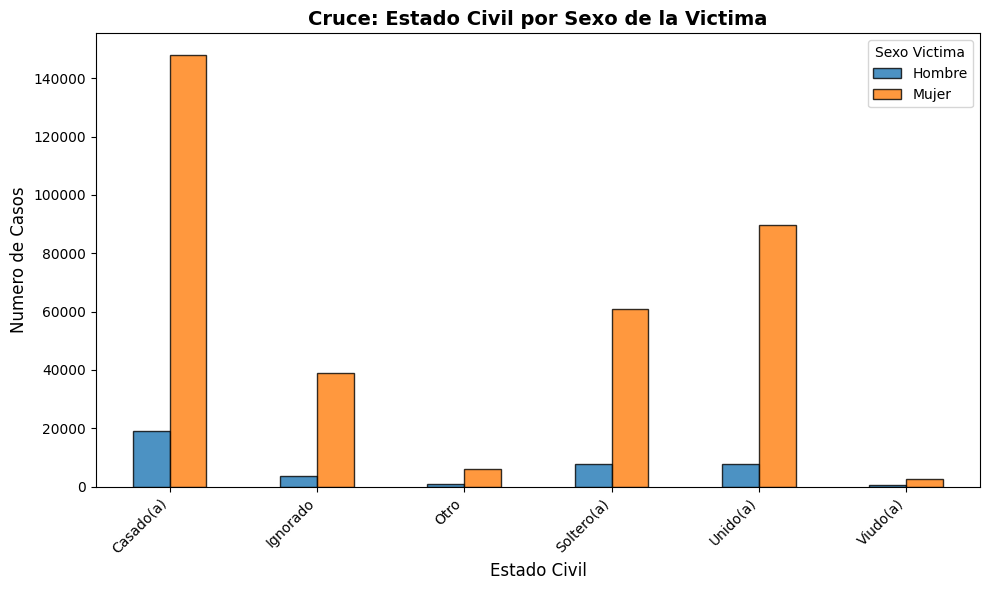


HALLAZGO: Este cruce muestra si el estado civil influye en la
vulnerabilidad a sufrir violencia intrafamiliar.


In [11]:
# CRUCE 3: ESTADO CIVIL VS SEXO DE LA VICTIMA

print("="*70)
print("CRUCE 3: ESTADO CIVIL VS SEXO DE LA VICTIMA")
print("="*70)
print("Este cruce nos muestra en que situacion conyugal hay mas violencia.")
print("-"*70)

# Tabla de contingencia
cruce3 = pd.crosstab(data['VIC_EST_CIV'], data['VIC_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce3.index = cruce3.index.map(lambda x: etiquetas['VIC_EST_CIV'].get(x, x) if x != 'Total' else x)
cruce3.columns = cruce3.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce3)

# Porcentajes por columna
cruce3_pct = pd.crosstab(data['VIC_EST_CIV'], data['VIC_SEXO'], normalize='columns') * 100
cruce3_pct.index = cruce3_pct.index.map(lambda x: etiquetas['VIC_EST_CIV'].get(x, x))
cruce3_pct.columns = cruce3_pct.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))

print("\nPorcentaje por sexo de victima (columna):")
display(cruce3_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 6))
cruce3_plot = pd.crosstab(data['VIC_EST_CIV'].map(etiquetas['VIC_EST_CIV']), 
                          data['VIC_SEXO'].map(etiquetas['VIC_SEXO']))
cruce3_plot.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.8)
ax.set_xlabel('Estado Civil', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Estado Civil por Sexo de la Victima', fontsize=14, fontweight='bold')
ax.legend(title='Sexo Victima')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce muestra si el estado civil influye en la")
print("vulnerabilidad a sufrir violencia intrafamiliar.")

CRUCE 4: GRUPO ETNICO VS SEXO DE LA VICTIMA
Este cruce nos permite ver si hay diferencias por grupo etnico.
----------------------------------------------------------------------

Frecuencias absolutas:

Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_GRUPET,,,
Ladino,23359,194474,217833
Maya,12174,106453,118627
Garifuna,47,491,538
Xinka,63,497,560
Otro,251,2080,2331
No indica,3618,37354,40972
Ignorado,635,5761,6396
Total,40147,347110,387257



Porcentaje por sexo de victima (columna):


VIC_SEXO,Hombre,Mujer
VIC_GRUPET,,
Ladino,58.18,56.03
Maya,30.32,30.67
Garifuna,0.12,0.14
Xinka,0.16,0.14
Otro,0.63,0.60
No indica,9.01,10.76
Ignorado,1.58,1.66


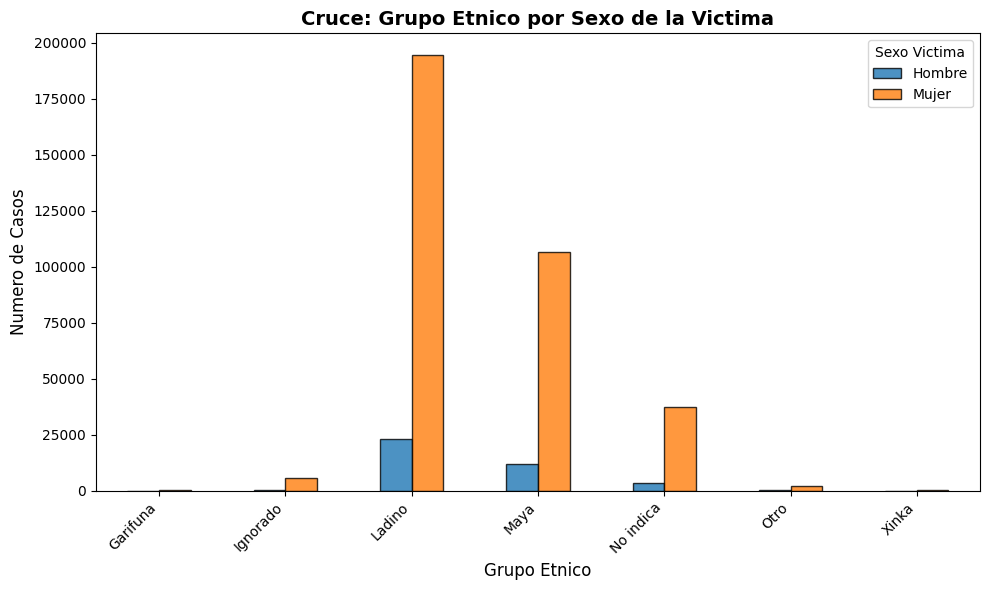


HALLAZGO: Este cruce permite ver si hay diferencias en la violencia
intrafamiliar segun el grupo etnico de la victima.


In [12]:
# CRUCE 4: GRUPO ETNICO VS SEXO DE LA VICTIMA

print("="*70)
print("CRUCE 4: GRUPO ETNICO VS SEXO DE LA VICTIMA")
print("="*70)
print("Este cruce nos permite ver si hay diferencias por grupo etnico.")
print("-"*70)

# Tabla de contingencia
cruce4 = pd.crosstab(data['VIC_GRUPET'], data['VIC_SEXO'], margins=True, margins_name='Total')

# Renombrar con etiquetas
cruce4.index = cruce4.index.map(lambda x: etiquetas['VIC_GRUPET'].get(x, x) if x != 'Total' else x)
cruce4.columns = cruce4.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x) if x != 'Total' else x)

print("\nFrecuencias absolutas:")
display(cruce4)

# Porcentajes por columna
cruce4_pct = pd.crosstab(data['VIC_GRUPET'], data['VIC_SEXO'], normalize='columns') * 100
cruce4_pct.index = cruce4_pct.index.map(lambda x: etiquetas['VIC_GRUPET'].get(x, x))
cruce4_pct.columns = cruce4_pct.columns.map(lambda x: etiquetas['VIC_SEXO'].get(x, x))

print("\nPorcentaje por sexo de victima (columna):")
display(cruce4_pct.round(2))

# Visualizacion
fig, ax = plt.subplots(figsize=(10, 6))
cruce4_plot = pd.crosstab(data['VIC_GRUPET'].map(etiquetas['VIC_GRUPET']), 
                          data['VIC_SEXO'].map(etiquetas['VIC_SEXO']))
cruce4_plot.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.8)
ax.set_xlabel('Grupo Etnico', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Cruce: Grupo Etnico por Sexo de la Victima', fontsize=14, fontweight='bold')
ax.legend(title='Sexo Victima')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nHALLAZGO: Este cruce permite ver si hay diferencias en la violencia")
print("intrafamiliar segun el grupo etnico de la victima.")

CRUCE 5: EDAD DE LA VICTIMA POR SEXO
Este cruce nos permite ver que edades son mas vulnerables por sexo.
----------------------------------------------------------------------

Estadisticas de edad por sexo:

Estadisticas de edad por sexo:


,count,mean,std,min,25%,50%,75%,max
VIC_SEXO,,,,,,,,
Hombre,40147.0,40.26,18.00,1.0,27.0,36.0,51.0,99.0
Mujer,347110.0,32.73,13.78,1.0,23.0,30.0,38.0,99.0


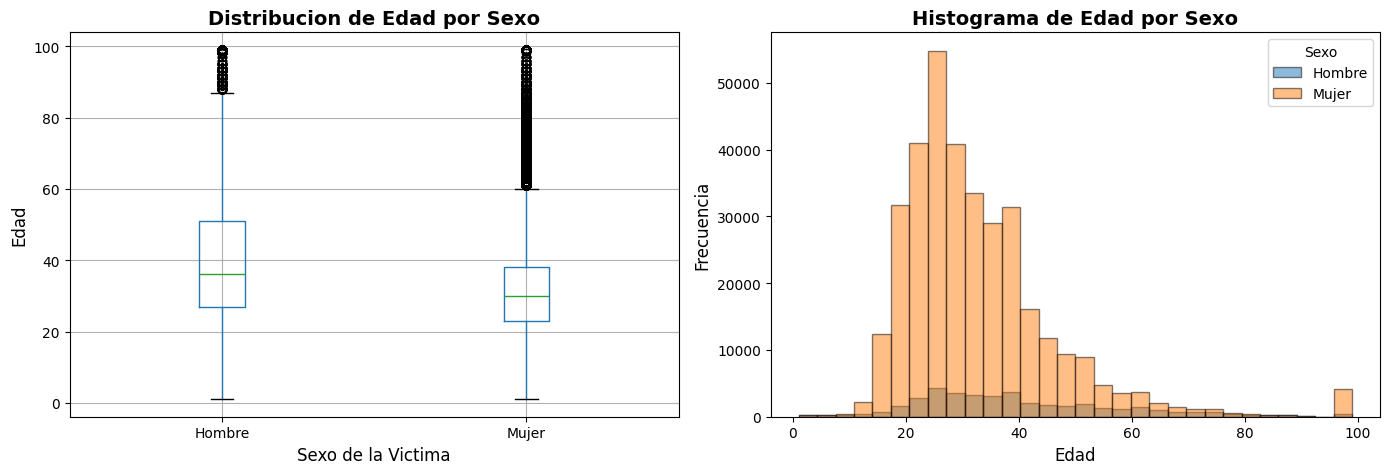


Distribucion por rango de edad y sexo:


VIC_SEXO,Hombre,Mujer,Total
RANGO_EDAD,,,
0-12,835,1264,2099
13-17,940,14076,15016
18-25,6494,101165,107659
26-35,10969,120964,131933
36-45,8027,64714,72741
46-55,5031,24901,29932
56-65,3634,9915,13549
66+,4217,10111,14328
Total,40147,347110,387257



HALLAZGO: Este cruce revela los rangos de edad mas vulnerables
a la violencia intrafamiliar, diferenciando por sexo.


In [13]:
# CRUCE 5: EDAD DE LA VICTIMA POR SEXO

print("="*70)
print("CRUCE 5: EDAD DE LA VICTIMA POR SEXO")
print("="*70)
print("Este cruce nos permite ver que edades son mas vulnerables por sexo.")
print("-"*70)

# Estadisticas de edad por sexo
edad_por_sexo = data.groupby('VIC_SEXO')['VIC_EDAD'].describe()
edad_por_sexo.index = edad_por_sexo.index.map(etiquetas['VIC_SEXO'])

print("\nEstadisticas de edad por sexo:")
display(edad_por_sexo.round(2))

# Boxplot de edad por sexo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
ax1 = axes[0]
data_boxplot = data[['VIC_SEXO', 'VIC_EDAD']].dropna().copy()
data_boxplot['VIC_SEXO'] = data_boxplot['VIC_SEXO'].map(etiquetas['VIC_SEXO'])
data_boxplot.boxplot(column='VIC_EDAD', by='VIC_SEXO', ax=ax1)
ax1.set_xlabel('Sexo de la Victima', fontsize=12)
ax1.set_ylabel('Edad', fontsize=12)
ax1.set_title('Distribucion de Edad por Sexo', fontsize=14, fontweight='bold')
plt.suptitle('')  # Quitar titulo automatico

# Histograma superpuesto
ax2 = axes[1]
for sexo_code, sexo_label in etiquetas['VIC_SEXO'].items():
    edades = data[data['VIC_SEXO'] == sexo_code]['VIC_EDAD'].dropna()
    ax2.hist(edades, bins=30, alpha=0.5, label=sexo_label, edgecolor='black')

ax2.set_xlabel('Edad', fontsize=12)
ax2.set_ylabel('Frecuencia', fontsize=12)
ax2.set_title('Histograma de Edad por Sexo', fontsize=14, fontweight='bold')
ax2.legend(title='Sexo')

plt.tight_layout()
plt.show()

# Crear rangos de edad para analisis
data['RANGO_EDAD'] = pd.cut(data['VIC_EDAD'], 
                            bins=[0, 12, 17, 25, 35, 45, 55, 65, 100],
                            labels=['0-12', '13-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

print("\nDistribucion por rango de edad y sexo:")
cruce5 = pd.crosstab(data['RANGO_EDAD'], data['VIC_SEXO'].map(etiquetas['VIC_SEXO']), margins=True, margins_name='Total')
display(cruce5)

print("\nHALLAZGO: Este cruce revela los rangos de edad mas vulnerables")
print("a la violencia intrafamiliar, diferenciando por sexo.")

In [14]:
# RESUMEN DE HALLAZGOS DEL INCISO 1C

print("="*70)
print("RESUMEN DE HALLAZGOS - CRUCE DE VARIABLES")
print("="*70)

# Calcular estadisticas clave para el resumen
total_casos = len(data)
mujeres_victimas = (data['VIC_SEXO'] == 2.0).sum()
hombres_victimas = (data['VIC_SEXO'] == 1.0).sum()
pct_mujeres = (mujeres_victimas / total_casos * 100)
pct_hombres = (hombres_victimas / total_casos * 100)

# Agresor mas comun cuando victima es mujer
agresores_mujeres = data[data['VIC_SEXO'] == 2.0]['AGR_SEXO'].value_counts()
agresor_hombre_a_mujer = agresores_mujeres.get(1.0, 0)
pct_hombre_agrede_mujer = (agresor_hombre_a_mujer / mujeres_victimas * 100) if mujeres_victimas > 0 else 0

# Relacion mas comun
relacion_comun = data['VIC_REL_AGR'].mode().iloc[0]
relacion_comun_label = etiquetas['VIC_REL_AGR'].get(relacion_comun, 'Desconocido')

# Estado civil mas comun
estado_comun = data['VIC_EST_CIV'].mode().iloc[0]
estado_comun_label = etiquetas['VIC_EST_CIV'].get(estado_comun, 'Desconocido')

print(f"""
HALLAZGOS PRINCIPALES:

1. PERFIL DE VICTIMAS:
   - Total de casos analizados: {total_casos:,}
   - Mujeres victimas: {mujeres_victimas:,} ({pct_mujeres:.1f}%)
   - Hombres victimas: {hombres_victimas:,} ({pct_hombres:.1f}%)

2. PATRON AGRESOR-VICTIMA:
   - El {pct_hombre_agrede_mujer:.1f}% de las mujeres son agredidas por hombres
   - Esto confirma un patron claro de violencia de genero

3. RELACION MAS COMUN:
   - La relacion mas frecuente entre victima y agresor es: {relacion_comun_label}
   
4. ESTADO CIVIL MAS AFECTADO:
   - El estado civil con mas casos es: {estado_comun_label}

5. EDAD DE VICTIMAS:
   - Edad promedio victimas mujeres: {data[data['VIC_SEXO']==2.0]['VIC_EDAD'].mean():.1f} anios
   - Edad promedio victimas hombres: {data[data['VIC_SEXO']==1.0]['VIC_EDAD'].mean():.1f} anios

CONCLUSION:
Los cruces de variables revelan que la violencia intrafamiliar en Guatemala
afecta principalmente a mujeres, siendo el agresor tipicamente un hombre
con quien la victima tiene una relacion de pareja (esposo o conviviente).
""")

print("="*70)

RESUMEN DE HALLAZGOS - CRUCE DE VARIABLES

HALLAZGOS PRINCIPALES:

1. PERFIL DE VICTIMAS:
   - Total de casos analizados: 387,257
   - Mujeres victimas: 347,110 (89.6%)
   - Hombres victimas: 40,147 (10.4%)

2. PATRON AGRESOR-VICTIMA:
   - El 93.9% de las mujeres son agredidas por hombres
   - Esto confirma un patron claro de violencia de genero

3. RELACION MAS COMUN:
   - La relacion mas frecuente entre victima y agresor es: Esposo/a
   
4. ESTADO CIVIL MAS AFECTADO:
   - El estado civil con mas casos es: Casado(a)

5. EDAD DE VICTIMAS:
   - Edad promedio victimas mujeres: 32.7 anios
   - Edad promedio victimas hombres: 40.3 anios

CONCLUSION:
Los cruces de variables revelan que la violencia intrafamiliar en Guatemala
afecta principalmente a mujeres, siendo el agresor tipicamente un hombre
con quien la victima tiene una relacion de pareja (esposo o conviviente).



## 1d) Preguntas de Investigacion - Validacion de Hipotesis

En esta seccion formulamos 5 preguntas de investigacion basadas en supuestos o creencias previas sobre la violencia intrafamiliar. Cada hipotesis sera validada o refutada mediante el analisis de los datos.

Las preguntas que exploraremos son:

1. **Hipotesis 1:** La violencia intrafamiliar ha aumentado con el paso de los anios (2009-2020)
2. **Hipotesis 2:** La violencia intrafamiliar ocurre mas en areas urbanas que rurales
3. **Hipotesis 3:** Las victimas con menor nivel de escolaridad sufren mas violencia
4. **Hipotesis 4:** Existe un patron temporal donde ciertos meses del anio tienen mas casos
5. **Hipotesis 5:** Las mujeres que no trabajan (amas de casa) son mas vulnerables a la violencia

PREGUNTA 1: La violencia intrafamiliar ha aumentado entre 2009 y 2020?

SUPUESTO INICIAL:
Se cree que la violencia intrafamiliar ha ido en aumento con el paso de los 
anios debido a factores como el estres economico, cambios sociales y mayor 
densidad poblacional.

Casos reportados por anio:


,Anio,Casos
0,2009,31497
1,2010,32017
2,2011,33484
3,2012,36107
4,2013,36170
5,2014,34330
6,2015,31929
7,2016,31190
8,2017,30384
9,2018,29992


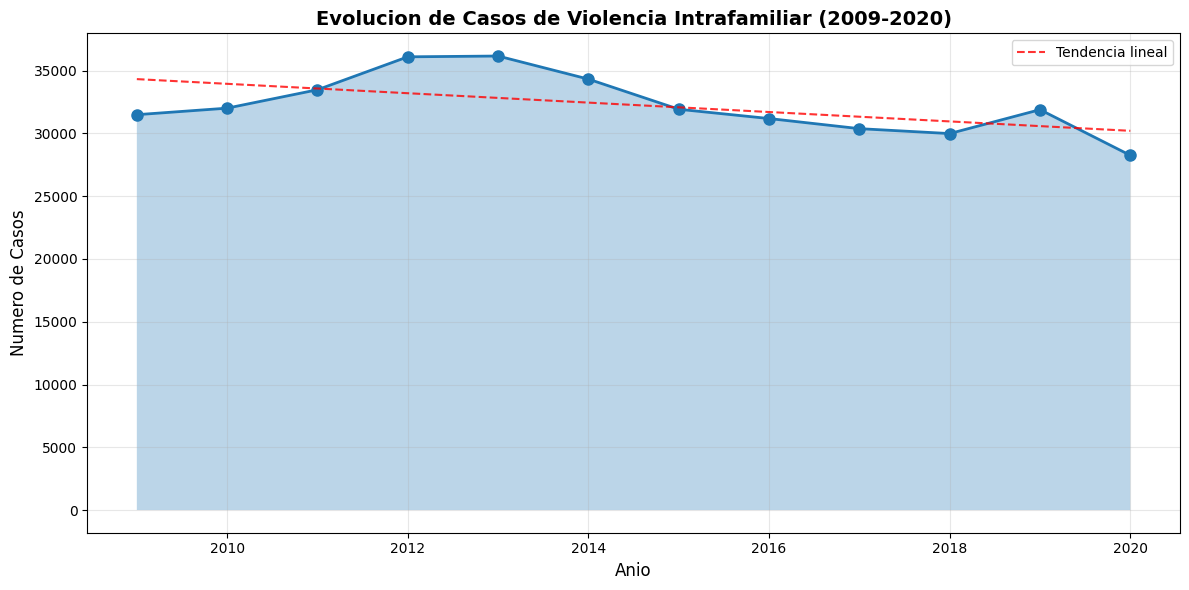

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Casos en 2009: 31,497
- Casos en 2020: 28,259
- Cambio porcentual: -10.3%

CONCLUSION:

HIPOTESIS REFUTADA: Contrario a lo esperado, los casos han DISMINUIDO
(-10.3% entre 2009 y 2020).
Esto podria deberse a: menor reporte, mejores politicas de prevencion,
o efectos de la pandemia COVID-19 en 2020.

Nota: Es importante considerar que una disminucion en 2020 podria estar
relacionada con el confinamiento por COVID-19 y menor acceso a denuncias.


In [15]:
# INCISO 1D) PREGUNTA DE INVESTIGACION 1
# ============================================================================
# HIPOTESIS 1: La violencia intrafamiliar ha aumentado con el paso de los anios
# ============================================================================

print("="*75)
print("PREGUNTA 1: La violencia intrafamiliar ha aumentado entre 2009 y 2020?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que la violencia intrafamiliar ha ido en aumento con el paso de los 
anios debido a factores como el estres economico, cambios sociales y mayor 
densidad poblacional.
""")

# Analisis: Casos por anio
casos_por_anio = data['__source_year'].value_counts().sort_index()
casos_por_anio_df = pd.DataFrame({
    'Anio': casos_por_anio.index,
    'Casos': casos_por_anio.values
})

print("Casos reportados por anio:")
display(casos_por_anio_df)

# Calcular tasa de cambio
primer_anio = int(casos_por_anio.index[0])
ultimo_anio = int(casos_por_anio.index[-1])
casos_inicio = casos_por_anio.iloc[0]
casos_fin = casos_por_anio.iloc[-1]
cambio_porcentual = ((casos_fin - casos_inicio) / casos_inicio) * 100

# Visualizacion
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(casos_por_anio.index.astype(int), casos_por_anio.values, marker='o', linewidth=2, markersize=8)
ax.fill_between(casos_por_anio.index.astype(int), casos_por_anio.values, alpha=0.3)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Numero de Casos', fontsize=12)
ax.set_title('Evolucion de Casos de Violencia Intrafamiliar (2009-2020)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Anadir linea de tendencia
z = np.polyfit(range(len(casos_por_anio)), casos_por_anio.values, 1)
p = np.poly1d(z)
ax.plot(casos_por_anio.index.astype(int), p(range(len(casos_por_anio))), 
        "r--", alpha=0.8, label=f'Tendencia lineal')
ax.legend()

plt.tight_layout()
plt.show()

# Conclusion
print("-"*75)
print("VALIDACION DE LA HIPOTESIS:")
print("-"*75)
print(f"""
Datos encontrados:
- Casos en {primer_anio}: {casos_inicio:,}
- Casos en {ultimo_anio}: {casos_fin:,}
- Cambio porcentual: {cambio_porcentual:+.1f}%

CONCLUSION:
""")

if cambio_porcentual > 10:
    print("HIPOTESIS CONFIRMADA: Los datos muestran un aumento significativo en los")
    print(f"casos reportados ({cambio_porcentual:+.1f}% entre {primer_anio} y {ultimo_anio}).")
elif cambio_porcentual < -10:
    print("HIPOTESIS REFUTADA: Contrario a lo esperado, los casos han DISMINUIDO")
    print(f"({cambio_porcentual:.1f}% entre {primer_anio} y {ultimo_anio}).")
    print("Esto podria deberse a: menor reporte, mejores politicas de prevencion,")
    print("o efectos de la pandemia COVID-19 en 2020.")
else:
    print("HIPOTESIS PARCIALMENTE REFUTADA: Los casos se han mantenido relativamente")
    print(f"estables ({cambio_porcentual:+.1f}% de cambio), sin una tendencia clara de aumento.")

print("\nNota: Es importante considerar que una disminucion en 2020 podria estar")
print("relacionada con el confinamiento por COVID-19 y menor acceso a denuncias.")
print("="*75)

PREGUNTA 2: Ocurre mas violencia intrafamiliar en areas urbanas?

SUPUESTO INICIAL:
Se cree que en las areas urbanas hay mas casos de violencia intrafamiliar 
debido a factores como el estres, hacinamiento, desempleo y mayor acceso 
a sustancias como el alcohol.

Distribucion de casos por area geografica:


,Codigo,Area,Casos,Porcentaje
0,1.0,Urbana,210589,54.38
1,2.0,Rural,158325,40.88
2,9.0,NaN,18343,4.74


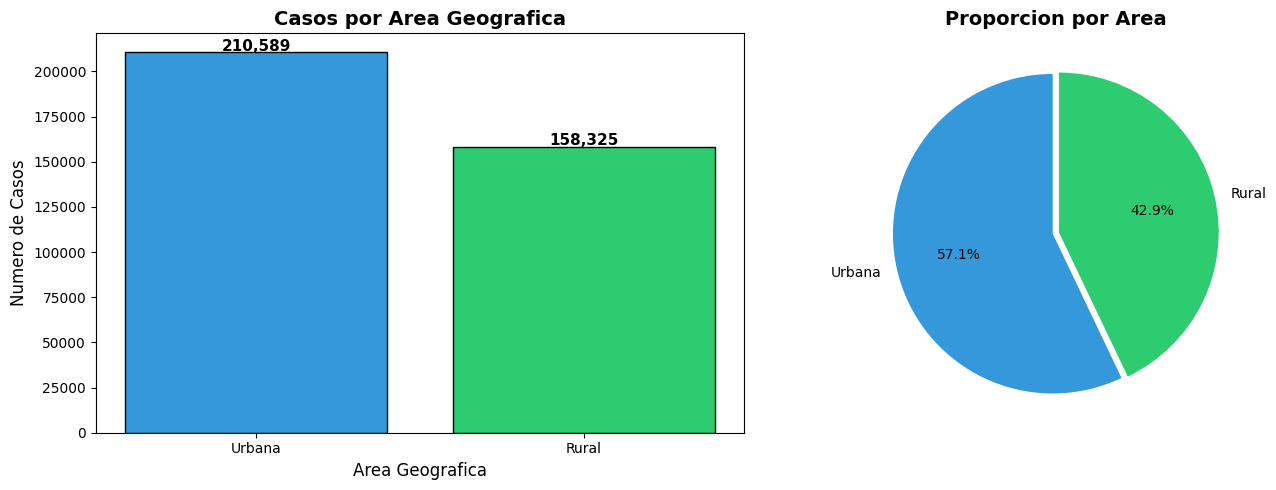

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Casos en area urbana: 210,589 (54.4%)
- Casos en area rural: 158,325 (40.9%)
- Diferencia: 52,264 casos

CONCLUSION:

HIPOTESIS CONFIRMADA: Los datos muestran que la mayoria de los casos
de violencia intrafamiliar ocurren en areas URBANAS (54.4%).
Esto puede explicarse por: mayor densidad poblacional, mayor acceso a
mecanismos de denuncia, o factores de estres urbano.


In [16]:
# PREGUNTA DE INVESTIGACION 2
# ============================================================================
# HIPOTESIS 2: La violencia intrafamiliar ocurre mas en areas urbanas que rurales
# ============================================================================

print("="*75)
print("PREGUNTA 2: Ocurre mas violencia intrafamiliar en areas urbanas?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que en las areas urbanas hay mas casos de violencia intrafamiliar 
debido a factores como el estres, hacinamiento, desempleo y mayor acceso 
a sustancias como el alcohol.
""")

# Verificar si existe la variable HEC_AREA
if 'HEC_AREA' in data.columns:
    # Analisis: Casos por area
    casos_por_area = data['HEC_AREA'].value_counts().sort_index()
    total_casos_area = casos_por_area.sum()
    
    # Crear tabla con etiquetas
    area_df = pd.DataFrame({
        'Codigo': casos_por_area.index,
        'Area': casos_por_area.index.map(etiquetas.get('HEC_AREA', {})),
        'Casos': casos_por_area.values,
        'Porcentaje': (casos_por_area.values / total_casos_area * 100).round(2)
    })
    
    print("Distribucion de casos por area geografica:")
    display(area_df)
    
    # Obtener valores
    casos_urbana = casos_por_area.get(1.0, 0)
    casos_rural = casos_por_area.get(2.0, 0)
    pct_urbana = (casos_urbana / total_casos_area * 100)
    pct_rural = (casos_rural / total_casos_area * 100)
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafico de barras
    ax1 = axes[0]
    areas = ['Urbana', 'Rural']
    valores = [casos_urbana, casos_rural]
    colores = ['#3498db', '#2ecc71']
    ax1.bar(areas, valores, color=colores, edgecolor='black')
    ax1.set_xlabel('Area Geografica', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Casos por Area Geografica', fontsize=14, fontweight='bold')
    
    # Anadir etiquetas de valor
    for i, (area, valor) in enumerate(zip(areas, valores)):
        ax1.text(i, valor + 1000, f'{valor:,}', ha='center', fontsize=11, fontweight='bold')
    
    # Grafico de pie
    ax2 = axes[1]
    ax2.pie([casos_urbana, casos_rural], labels=['Urbana', 'Rural'], 
            autopct='%1.1f%%', colors=colores, startangle=90, explode=(0.02, 0.02))
    ax2.set_title('Proporcion por Area', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados:
- Casos en area urbana: {casos_urbana:,} ({pct_urbana:.1f}%)
- Casos en area rural: {casos_rural:,} ({pct_rural:.1f}%)
- Diferencia: {abs(casos_urbana - casos_rural):,} casos

CONCLUSION:
""")
    
    if pct_urbana > pct_rural + 10:
        print("HIPOTESIS CONFIRMADA: Los datos muestran que la mayoria de los casos")
        print(f"de violencia intrafamiliar ocurren en areas URBANAS ({pct_urbana:.1f}%).")
        print("Esto puede explicarse por: mayor densidad poblacional, mayor acceso a")
        print("mecanismos de denuncia, o factores de estres urbano.")
    elif pct_rural > pct_urbana + 10:
        print("HIPOTESIS REFUTADA: Contrario a lo esperado, hay MAS casos en areas")
        print(f"RURALES ({pct_rural:.1f}%) que urbanas ({pct_urbana:.1f}%).")
    else:
        print("HIPOTESIS PARCIALMENTE CONFIRMADA: Aunque hay mas casos urbanos,")
        print("la diferencia no es tan marcada como se esperaba.")
        
else:
    print("La variable HEC_AREA no esta disponible en el dataset.")
    print("No es posible validar esta hipotesis con los datos actuales.")

print("="*75)

PREGUNTA 3: Las victimas con menor escolaridad son mas vulnerables?

SUPUESTO INICIAL:
Se cree que las personas con menor nivel educativo son mas vulnerables a 
sufrir violencia intrafamiliar, ya que pueden tener menor acceso a recursos
economicos, menor conocimiento de sus derechos y mayor dependencia economica.

Distribucion por nivel de alfabetismo:


,Codigo,Condicion,Casos,Porcentaje
0,1.0,Alfabeta,312259,80.79
1,2.0,Analfabeta,72147,18.67
2,9.0,Ignorado,2122,0.55


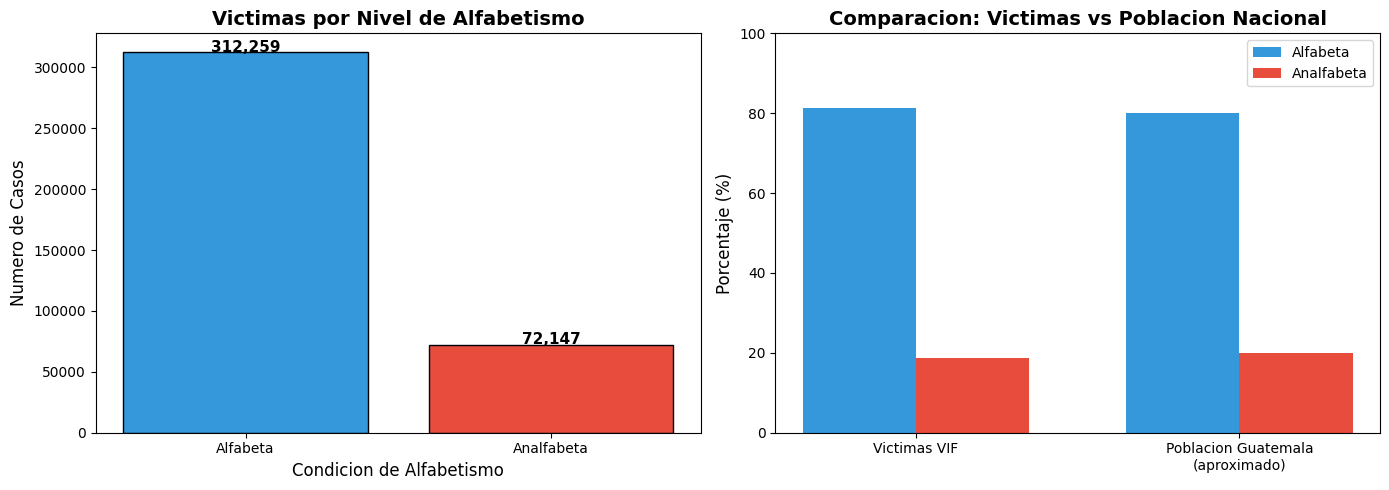

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Victimas alfabetas: 312,259 (81.2%)
- Victimas analfabetas: 72,147 (18.8%)
- Tasa de alfabetismo nacional (aproximada): 80%

Comparacion:
- Analfabetismo en victimas: 18.8%
- Analfabetismo nacional aproximado: 20%

CONCLUSION:

HIPOTESIS PARCIALMENTE REFUTADA: Aunque la mayoria de victimas son
alfabetas, esto refleja la composicion de la poblacion general.
La escolaridad por si sola no parece ser un factor determinante.


In [17]:
# PREGUNTA DE INVESTIGACION 3
# ============================================================================
# HIPOTESIS 3: Las victimas con menor nivel de escolaridad sufren mas violencia
# ============================================================================

print("="*75)
print("PREGUNTA 3: Las victimas con menor escolaridad son mas vulnerables?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que las personas con menor nivel educativo son mas vulnerables a 
sufrir violencia intrafamiliar, ya que pueden tener menor acceso a recursos
economicos, menor conocimiento de sus derechos y mayor dependencia economica.
""")

# Verificar si existe la variable VIC_ALFAB (alfabetismo)
if 'VIC_ALFAB' in data.columns:
    # Analisis: Alfabetismo de victimas
    alfabetismo = data['VIC_ALFAB'].value_counts().sort_index()
    total_alfa = alfabetismo.sum()
    
    # Crear tabla con etiquetas
    alfa_df = pd.DataFrame({
        'Codigo': alfabetismo.index,
        'Condicion': alfabetismo.index.map(etiquetas.get('VIC_ALFAB', {})),
        'Casos': alfabetismo.values,
        'Porcentaje': (alfabetismo.values / total_alfa * 100).round(2)
    })
    
    print("Distribucion por nivel de alfabetismo:")
    display(alfa_df)
    
    # Valores
    alfabetas = alfabetismo.get(1.0, 0)
    analfabetas = alfabetismo.get(2.0, 0)
    total_conocido = alfabetas + analfabetas
    pct_alfabetas = (alfabetas / total_conocido * 100) if total_conocido > 0 else 0
    pct_analfabetas = (analfabetas / total_conocido * 100) if total_conocido > 0 else 0
    
    # Comparar con estadisticas nacionales (aproximadamente 80% alfabetismo en Guatemala)
    alfabetismo_nacional = 80  # Aproximado
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafico de barras - Victimas
    ax1 = axes[0]
    condiciones = ['Alfabeta', 'Analfabeta']
    valores = [alfabetas, analfabetas]
    colores = ['#3498db', '#e74c3c']
    ax1.bar(condiciones, valores, color=colores, edgecolor='black')
    ax1.set_xlabel('Condicion de Alfabetismo', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Victimas por Nivel de Alfabetismo', fontsize=14, fontweight='bold')
    for i, v in enumerate(valores):
        ax1.text(i, v + 500, f'{v:,}', ha='center', fontsize=11, fontweight='bold')
    
    # Comparacion con poblacion nacional
    ax2 = axes[1]
    categorias = ['Victimas VIF', 'Poblacion Guatemala\n(aproximado)']
    alfabetas_pct = [pct_alfabetas, alfabetismo_nacional]
    analfabetas_pct = [pct_analfabetas, 100 - alfabetismo_nacional]
    
    x = np.arange(len(categorias))
    width = 0.35
    ax2.bar(x - width/2, alfabetas_pct, width, label='Alfabeta', color='#3498db')
    ax2.bar(x + width/2, analfabetas_pct, width, label='Analfabeta', color='#e74c3c')
    ax2.set_ylabel('Porcentaje (%)', fontsize=12)
    ax2.set_title('Comparacion: Victimas vs Poblacion Nacional', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(categorias)
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados:
- Victimas alfabetas: {alfabetas:,} ({pct_alfabetas:.1f}%)
- Victimas analfabetas: {analfabetas:,} ({pct_analfabetas:.1f}%)
- Tasa de alfabetismo nacional (aproximada): {alfabetismo_nacional}%

Comparacion:
- Analfabetismo en victimas: {pct_analfabetas:.1f}%
- Analfabetismo nacional aproximado: {100 - alfabetismo_nacional}%

CONCLUSION:
""")
    
    if pct_analfabetas > (100 - alfabetismo_nacional) + 5:
        print("HIPOTESIS CONFIRMADA: El porcentaje de analfabetas entre las victimas")
        print(f"({pct_analfabetas:.1f}%) es MAYOR que en la poblacion general (~{100-alfabetismo_nacional}%).")
        print("Esto sugiere que las personas con menor educacion son mas vulnerables")
        print("a la violencia intrafamiliar.")
    else:
        print("HIPOTESIS PARCIALMENTE REFUTADA: Aunque la mayoria de victimas son")
        print("alfabetas, esto refleja la composicion de la poblacion general.")
        print("La escolaridad por si sola no parece ser un factor determinante.")

else:
    print("La variable VIC_ALFAB no esta disponible en el dataset.")

print("="*75)

PREGUNTA 4: Hay meses con mas casos de violencia intrafamiliar?

SUPUESTO INICIAL:
Se cree que existen patrones temporales en la violencia intrafamiliar, con 
posibles aumentos en meses de festividades (diciembre, fiestas patrias) o 
periodos de estres economico, debido al consumo de alcohol y tensiones familiares.

Distribucion de casos por mes:


,Mes,Casos,Porcentaje
0,Enero,31177,8.05
1,Febrero,32014,8.27
2,Marzo,33506,8.65
3,Abril,33162,8.56
4,Mayo,34481,8.90
5,Junio,32769,8.46
6,Julio,34735,8.97
7,Agosto,33730,8.71
8,Septiembre,31838,8.22
9,Octubre,31338,8.09


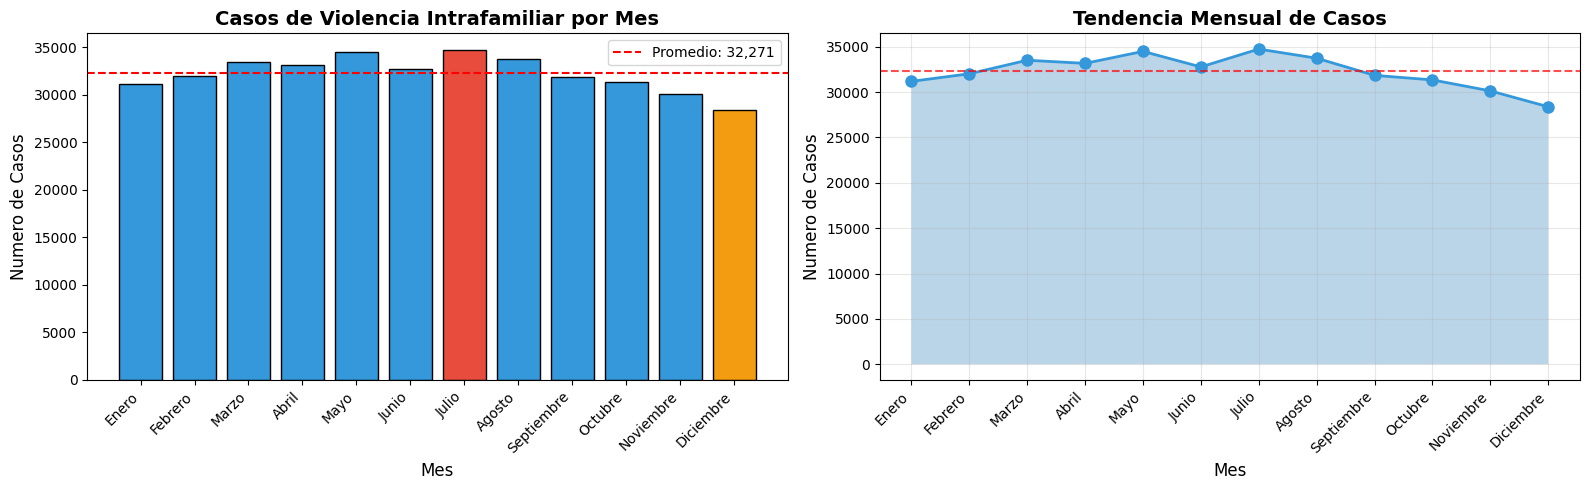

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados:
- Promedio mensual: 32,271 casos
- Mes con MAS casos: Julio (34,735 casos)
- Mes con MENOS casos: Diciembre (28,378 casos)
- Variacion entre maximo y minimo: 19.7% respecto al promedio

CONCLUSION:

HIPOTESIS PARCIALMENTE REFUTADA: Aunque hay variaciones mensuales,
la diferencia no es tan marcada como se esperaba.
Los casos se distribuyen de manera relativamente uniforme durante el anio.


In [18]:
# PREGUNTA DE INVESTIGACION 4
# ============================================================================
# HIPOTESIS 4: Existen meses del anio con mas casos de violencia intrafamiliar
# ============================================================================

print("="*75)
print("PREGUNTA 4: Hay meses con mas casos de violencia intrafamiliar?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que existen patrones temporales en la violencia intrafamiliar, con 
posibles aumentos en meses de festividades (diciembre, fiestas patrias) o 
periodos de estres economico, debido al consumo de alcohol y tensiones familiares.
""")

# Usar MES_EMISION o HEC_MES
mes_col = 'MES_EMISION' if 'MES_EMISION' in data.columns else 'HEC_MES'

if mes_col in data.columns:
    # Analisis: Casos por mes
    casos_por_mes = data[mes_col].value_counts().sort_index()
    
    # Nombres de meses
    meses_nombres = {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril',
                     5.0: 'Mayo', 6.0: 'Junio', 7.0: 'Julio', 8.0: 'Agosto',
                     9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'}
    
    # Crear tabla
    mes_df = pd.DataFrame({
        'Mes': casos_por_mes.index.map(meses_nombres),
        'Casos': casos_por_mes.values,
        'Porcentaje': (casos_por_mes.values / casos_por_mes.sum() * 100).round(2)
    })
    
    print("Distribucion de casos por mes:")
    display(mes_df)
    
    # Estadisticas
    promedio_mensual = casos_por_mes.mean()
    mes_max = casos_por_mes.idxmax()
    mes_min = casos_por_mes.idxmin()
    casos_max = casos_por_mes.max()
    casos_min = casos_por_mes.min()
    variacion = ((casos_max - casos_min) / promedio_mensual * 100)
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Grafico de barras
    ax1 = axes[0]
    meses_orden = [meses_nombres[i] for i in sorted(casos_por_mes.index)]
    valores_orden = [casos_por_mes[i] for i in sorted(casos_por_mes.index)]
    colores = ['#e74c3c' if v == casos_max else '#f39c12' if v == casos_min else '#3498db' 
               for v in valores_orden]
    
    ax1.bar(meses_orden, valores_orden, color=colores, edgecolor='black')
    ax1.axhline(y=promedio_mensual, color='red', linestyle='--', label=f'Promedio: {promedio_mensual:,.0f}')
    ax1.set_xlabel('Mes', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Casos de Violencia Intrafamiliar por Mes', fontsize=14, fontweight='bold')
    ax1.legend()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Grafico de linea (patron circular)
    ax2 = axes[1]
    ax2.plot(meses_orden, valores_orden, marker='o', linewidth=2, markersize=8, color='#3498db')
    ax2.fill_between(meses_orden, valores_orden, alpha=0.3)
    ax2.axhline(y=promedio_mensual, color='red', linestyle='--', alpha=0.7)
    ax2.set_xlabel('Mes', fontsize=12)
    ax2.set_ylabel('Numero de Casos', fontsize=12)
    ax2.set_title('Tendencia Mensual de Casos', fontsize=14, fontweight='bold')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados:
- Promedio mensual: {promedio_mensual:,.0f} casos
- Mes con MAS casos: {meses_nombres[mes_max]} ({casos_max:,} casos)
- Mes con MENOS casos: {meses_nombres[mes_min]} ({casos_min:,} casos)
- Variacion entre maximo y minimo: {variacion:.1f}% respecto al promedio

CONCLUSION:
""")
    
    if variacion > 20:
        print("HIPOTESIS CONFIRMADA: Existe un patron temporal marcado.")
        print(f"El mes de {meses_nombres[mes_max]} tiene significativamente mas casos.")
        if mes_max in [12.0, 9.0]:
            print("Esto coincide con festividades (diciembre) o fiestas patrias (septiembre).")
    else:
        print("HIPOTESIS PARCIALMENTE REFUTADA: Aunque hay variaciones mensuales,")
        print("la diferencia no es tan marcada como se esperaba.")
        print("Los casos se distribuyen de manera relativamente uniforme durante el anio.")

else:
    print("No se encontro variable de mes en el dataset.")

print("="*75)

PREGUNTA 5: Las mujeres que no trabajan son mas vulnerables?

SUPUESTO INICIAL:
Se cree que las mujeres que no trabajan (amas de casa) son mas vulnerables 
a la violencia intrafamiliar debido a su dependencia economica del agresor,
lo que dificulta que puedan abandonar la situacion de violencia.

Condicion laboral de MUJERES victimas (n=347,110):
Condicion laboral de MUJERES victimas (n=347,110):


,Codigo,Condicion,Casos,Porcentaje
0,1.0,Si trabaja,91949,26.52
1,2.0,No trabaja,253152,73.01
2,9.0,Ignorado,1621,0.47


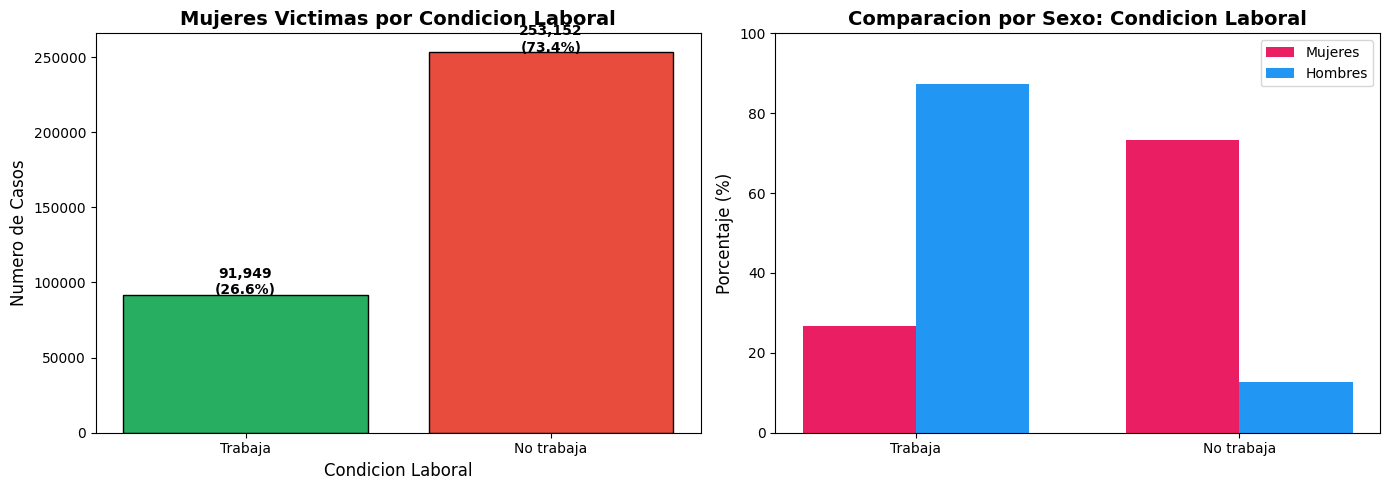

---------------------------------------------------------------------------
VALIDACION DE LA HIPOTESIS:
---------------------------------------------------------------------------

Datos encontrados (solo mujeres victimas):
- Mujeres que SI trabajan: 91,949 (26.6%)
- Mujeres que NO trabajan: 253,152 (73.4%)

Comparacion con hombres victimas:
- Hombres que no trabajan: 12.8%

CONCLUSION:

HIPOTESIS CONFIRMADA: La mayoria de las mujeres victimas NO trabajan
(73.4%), lo que sugiere que la dependencia economica
puede ser un factor de vulnerabilidad importante.
Esto refuerza la teoria de que la independencia economica puede ser
un factor protector contra la violencia intrafamiliar.


In [19]:
# PREGUNTA DE INVESTIGACION 5
# ============================================================================
# HIPOTESIS 5: Las mujeres que no trabajan son mas vulnerables a la violencia
# ============================================================================

print("="*75)
print("PREGUNTA 5: Las mujeres que no trabajan son mas vulnerables?")
print("="*75)

print("""
SUPUESTO INICIAL:
Se cree que las mujeres que no trabajan (amas de casa) son mas vulnerables 
a la violencia intrafamiliar debido a su dependencia economica del agresor,
lo que dificulta que puedan abandonar la situacion de violencia.
""")

if 'VIC_TRABAJA' in data.columns and 'VIC_SEXO' in data.columns:
    # Filtrar solo mujeres
    mujeres = data[data['VIC_SEXO'] == 2.0]
    total_mujeres = len(mujeres)
    
    # Analisis: Condicion laboral de mujeres victimas
    trabajo_mujeres = mujeres['VIC_TRABAJA'].value_counts().sort_index()
    
    # Etiquetas para trabajo
    trabajo_etiquetas = {1.0: 'Si trabaja', 2.0: 'No trabaja', 9.0: 'Ignorado'}
    
    # Crear tabla
    trabajo_df = pd.DataFrame({
        'Codigo': trabajo_mujeres.index,
        'Condicion': trabajo_mujeres.index.map(trabajo_etiquetas),
        'Casos': trabajo_mujeres.values,
        'Porcentaje': (trabajo_mujeres.values / trabajo_mujeres.sum() * 100).round(2)
    })
    
    print(f"Condicion laboral de MUJERES victimas (n={total_mujeres:,}):")
    display(trabajo_df)
    
    # Valores
    trabajan = trabajo_mujeres.get(1.0, 0)
    no_trabajan = trabajo_mujeres.get(2.0, 0)
    total_conocido = trabajan + no_trabajan
    pct_trabajan = (trabajan / total_conocido * 100) if total_conocido > 0 else 0
    pct_no_trabajan = (no_trabajan / total_conocido * 100) if total_conocido > 0 else 0
    
    # Comparar con hombres
    hombres = data[data['VIC_SEXO'] == 1.0]
    trabajo_hombres = hombres['VIC_TRABAJA'].value_counts().sort_index()
    hombres_trabajan = trabajo_hombres.get(1.0, 0)
    hombres_no_trabajan = trabajo_hombres.get(2.0, 0)
    total_hombres_conocido = hombres_trabajan + hombres_no_trabajan
    pct_hombres_no_trabajan = (hombres_no_trabajan / total_hombres_conocido * 100) if total_hombres_conocido > 0 else 0
    
    # Visualizacion
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafico de mujeres
    ax1 = axes[0]
    condiciones = ['Trabaja', 'No trabaja']
    valores_mujeres = [trabajan, no_trabajan]
    colores = ['#27ae60', '#e74c3c']
    ax1.bar(condiciones, valores_mujeres, color=colores, edgecolor='black')
    ax1.set_xlabel('Condicion Laboral', fontsize=12)
    ax1.set_ylabel('Numero de Casos', fontsize=12)
    ax1.set_title('Mujeres Victimas por Condicion Laboral', fontsize=14, fontweight='bold')
    for i, v in enumerate(valores_mujeres):
        ax1.text(i, v + 500, f'{v:,}\n({[pct_trabajan, pct_no_trabajan][i]:.1f}%)', 
                ha='center', fontsize=10, fontweight='bold')
    
    # Comparacion hombres vs mujeres
    ax2 = axes[1]
    x = np.arange(2)
    width = 0.35
    
    pcts_mujeres = [pct_trabajan, pct_no_trabajan]
    pcts_hombres = [(hombres_trabajan/total_hombres_conocido*100) if total_hombres_conocido > 0 else 0,
                    pct_hombres_no_trabajan]
    
    ax2.bar(x - width/2, pcts_mujeres, width, label='Mujeres', color='#e91e63')
    ax2.bar(x + width/2, pcts_hombres, width, label='Hombres', color='#2196f3')
    ax2.set_ylabel('Porcentaje (%)', fontsize=12)
    ax2.set_title('Comparacion por Sexo: Condicion Laboral', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Trabaja', 'No trabaja'])
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Conclusion
    print("-"*75)
    print("VALIDACION DE LA HIPOTESIS:")
    print("-"*75)
    print(f"""
Datos encontrados (solo mujeres victimas):
- Mujeres que SI trabajan: {trabajan:,} ({pct_trabajan:.1f}%)
- Mujeres que NO trabajan: {no_trabajan:,} ({pct_no_trabajan:.1f}%)

Comparacion con hombres victimas:
- Hombres que no trabajan: {pct_hombres_no_trabajan:.1f}%

CONCLUSION:
""")
    
    if pct_no_trabajan > 60:
        print("HIPOTESIS CONFIRMADA: La mayoria de las mujeres victimas NO trabajan")
        print(f"({pct_no_trabajan:.1f}%), lo que sugiere que la dependencia economica")
        print("puede ser un factor de vulnerabilidad importante.")
        print("Esto refuerza la teoria de que la independencia economica puede ser")
        print("un factor protector contra la violencia intrafamiliar.")
    elif pct_no_trabajan > pct_trabajan:
        print("HIPOTESIS PARCIALMENTE CONFIRMADA: Hay mas mujeres victimas que no")
        print(f"trabajan ({pct_no_trabajan:.1f}%) que las que si trabajan ({pct_trabajan:.1f}%),")
        print("aunque la diferencia no es tan marcada como se esperaba.")
    else:
        print("HIPOTESIS REFUTADA: Contrario a lo esperado, hay mas mujeres victimas")
        print(f"que SI trabajan ({pct_trabajan:.1f}%).")
        print("Esto sugiere que trabajar no necesariamente protege de la violencia.")

else:
    print("Variables necesarias no disponibles en el dataset.")

print("="*75)